In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from enderscope import SerialDevice, Stage


# Autofocus

In [3]:
from picamera2 import Picamera2
try:
    cam
except NameError:
    pass
else:
    cam.close()
cam = Picamera2()
cam.start(show_preview=True)

In [4]:
cam.set_controls({'AwbEnable':True,'AeEnable':False})
cam.set_controls({'ExposureTime':50000, 'AnalogueGain':3.0})

In [12]:
# list available serial ports
ports = SerialDevice.serial_ports()
print(ports)

In [13]:
light_port = ports[1]
stage_port = ports[2]
stage = Stage(stage_port, 115200)
stage.home()

array([-15. , -13.5, -12. , -10.5,  -9. ,  -7.5,  -6. ,  -4.5,  -3. ,
        -1.5,   0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,
        12. ,  13.5])

In [14]:


# Laplacian variance calculus function
def Var(img):
    laplacian = cv2.Laplacian(img, cv2.CV_32F)
    variance = laplacian.var()
    return variance

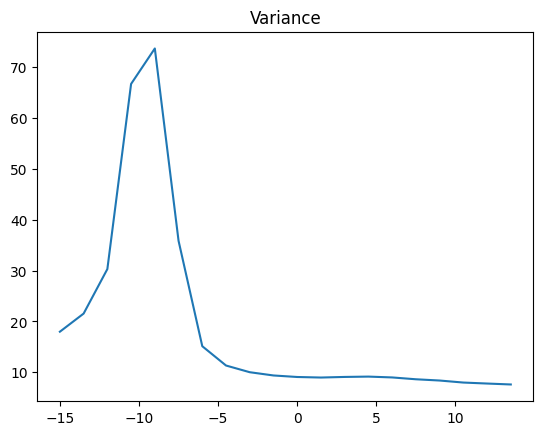

In [15]:
stage.move_position([55, 75, 30])

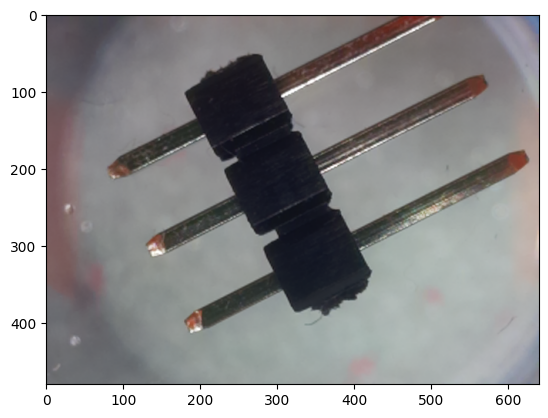

In [17]:
z_range = np.array(range(-10, 10, 1)) * 1.5
z_range

In [ ]:
pos = stage.get_position()
max_score = -1
best_z = 0
variances = []

for z in z_range:
    stage.move_position([pos[0], pos[1], z + pos[2]])
    stage.finish_moves()
    img = cam.capture_array('main')
    gray_image = (np.float32(img[:, :, 0]) + np.float32(img[:, :, 1]) + np.float32(img[:, :, 2])) / 3
    score = Var(gray_image)
    variances.append(score)
    if score > max_score:
        max_score = score
        best_z = z

In [ ]:
plt.title('Variance')
plt.plot(z_range, variances)


In [ ]:
stage.move_position([pos[0], pos[1], pos[2] + best_z])
stage.finish_moves()
img = cam.capture_array('main')
img_plot = plt.imshow(img)